In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# **2 - Load Data**

In [2]:
df = pd.read_csv("coin_Ethereum.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [3]:
df.isnull().sum()

,0
SNo,0
Name,0
Symbol,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Marketcap,0


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


# **3 - Exploratory Data Analysis**

## **3.1 Name Column**

In [6]:
df['Name']

,Name
0,Ethereum
1,Ethereum
2,Ethereum
3,Ethereum
4,Ethereum
...,...
2155,Ethereum
2156,Ethereum
2157,Ethereum
2158,Ethereum


In [7]:
df['Name'].isnull().sum()

np.int64(0)

In [8]:
df['Name'].describe()

,Name
count,2160
unique,1
top,Ethereum
freq,2160


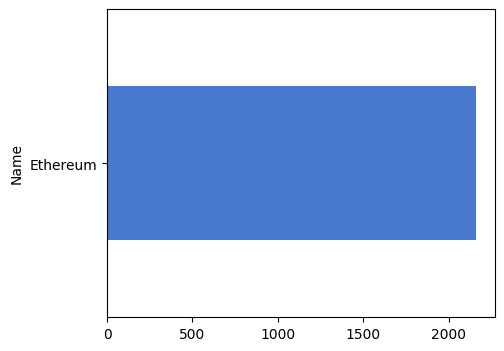

In [9]:
# Graph of values in columns "Name"

plt.figure(figsize=(5,4))
sns.set_palette("muted")
df['Name'].value_counts().plot(kind='barh')
plt.show()

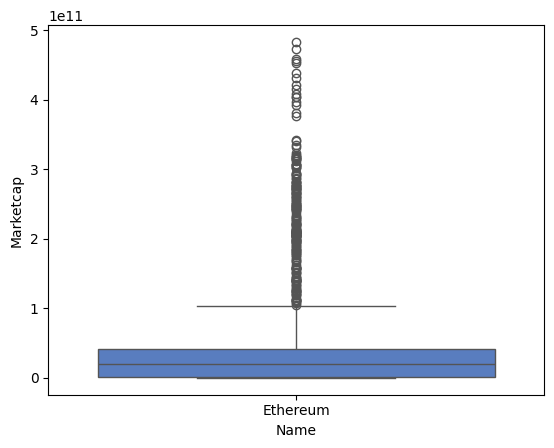

In [10]:
# "Name" vs "Marketcap" graph

sns.boxplot(x='Name', y='Marketcap', data=df)
plt.show()

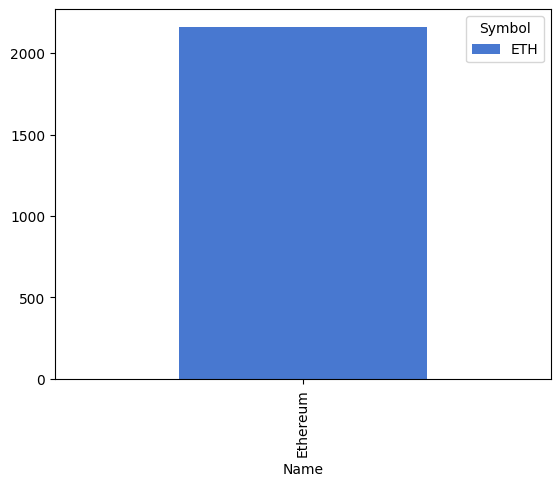

In [11]:
# "Name" vs "Symbol" graph

pd.crosstab(df['Name'], df['Symbol']).plot(kind='bar')
plt.show()

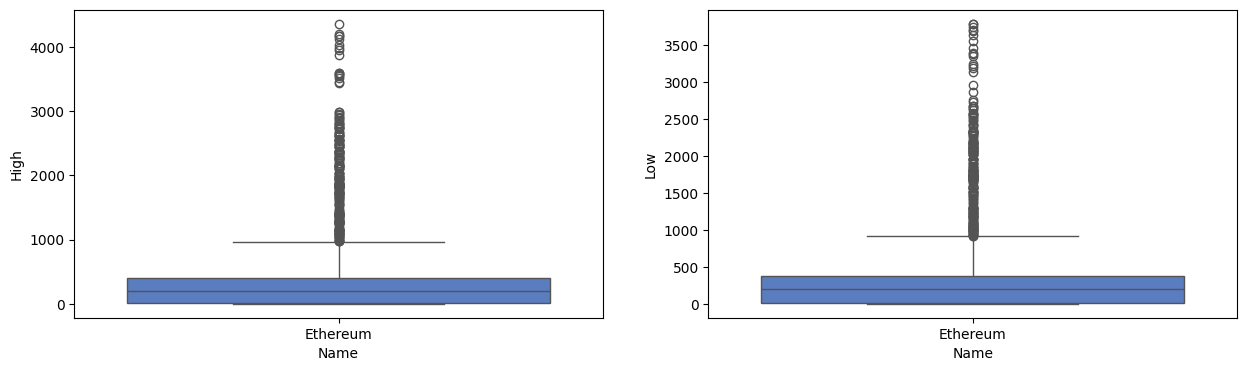

In [12]:
# "Name" vs "High" and "Low" graph

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='Name', y='High', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='Name', y='Low', data=df)
plt.show()

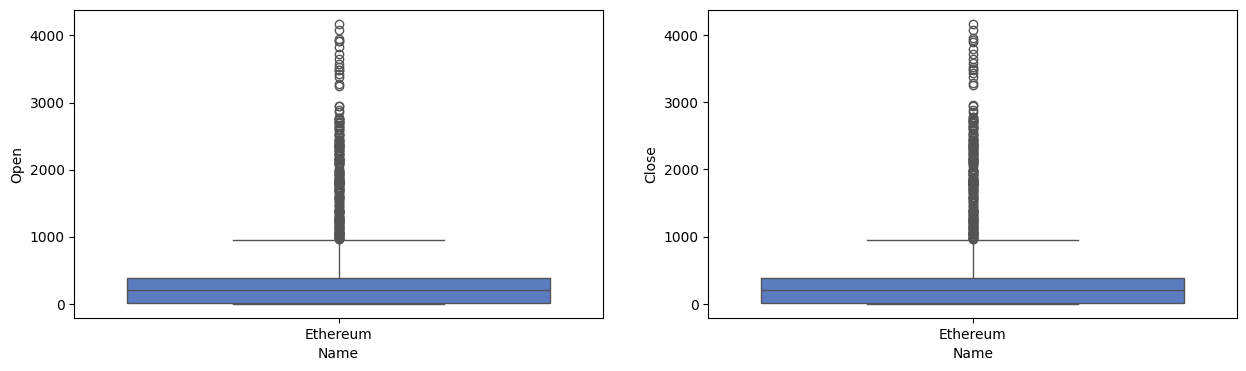

In [13]:
# "Name" vs "Open" and "Close" graph

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='Name', y='Open', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='Name', y='Close', data=df)
plt.show()

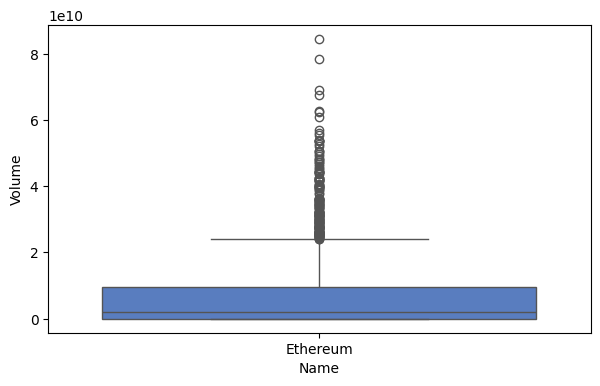

In [14]:
# "Name" vs "Volume" graph

plt.figure(figsize=(7,4))
sns.boxplot(x='Name', y='Volume', data=df)
plt.show()

## **3.2 High Column**

In [15]:
df['High']

,High
0,2.798810
1,0.879810
2,0.729854
3,1.131410
4,1.289940
...,...
2155,2155.596496
2156,2237.567155
2157,2384.286857
2158,2321.922836


In [16]:
df['High'].value_counts()

,count
High,
2275.382754,1
2278.414930,1
2377.195175,1
2457.175490,1
2554.628828,1
...,...
1.289940,1
1.131410,1
0.729854,1


In [17]:
df['High'].describe()

,High
count,2160.000000
mean,398.258568
std,628.082281
min,0.482988
25%,14.265225
50%,205.124631
75%,396.494561
max,4362.350542


In [18]:
df['High'].unique()

array([2.79881001e+00, 8.79809976e-01, 7.29853988e-01, ...,
       2.38428686e+03, 2.32192284e+03, 2.34629487e+03])

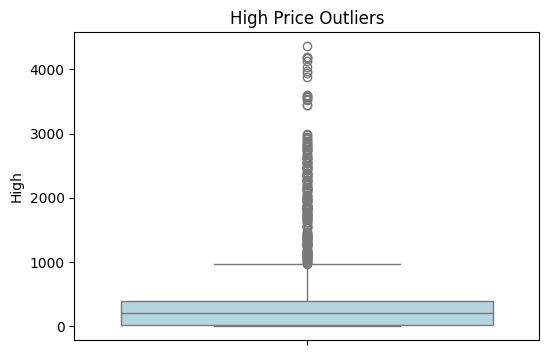

In [19]:
# Boxplot to detect outliers in price
plt.figure(figsize=(6,4))
sns.boxplot(y=df['High'], color='lightblue')
plt.title('High Price Outliers')
plt.show()

In [20]:
df['High'].skew()

np.float64(2.982709099007618)

Column Skewness: 2.982709099007618


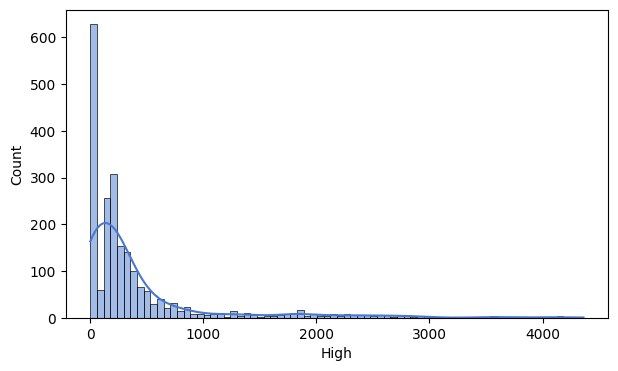

In [21]:
# Time to remove the outliers
print(f"Column Skewness: {df['High'].skew()}")
plt.figure(figsize=(7,4))
sns.histplot(df['High'],kde='True')
plt.show()

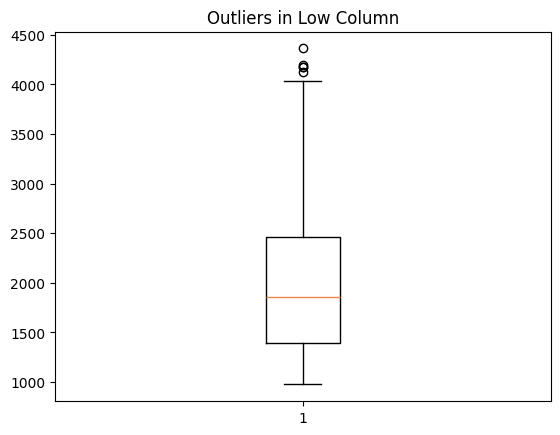

'Once we find the outliers now we have 2 methods of cleaning data\n    1- Trimming: Remove outliers.\n    2- Capping: Replace outliers with values at a defined boundary or percentile.\n    \nNote: I personally prefer second method because data is important for us so, \n      it is not the right way to discard it.\n'

In [22]:
outliers = pd.DataFrame()

Q3 = df['High'].quantile(0.75)
Q1 = df['High'].quantile(0.25)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers['High'] = df['High'][(df['High'] > upper_bound) | (df['High'] < lower_bound)]

plt.title('Outliers in Low Column')
plt.boxplot(outliers)
plt.show()
"""Once we find the outliers now we have 2 methods of cleaning data
    1- Trimming: Remove outliers.
    2- Capping: Replace outliers with values at a defined boundary or percentile.

Note: I personally prefer second method because data is important for us so,
      it is not the right way to discard it.
"""

In [23]:
# Removing outliers using Capping

df['High'] = np.where(
    df['High'] > upper_bound,
    upper_bound,
    np.where(
        df['High'] < lower_bound,
        lower_bound,
        df['High']
    )
)

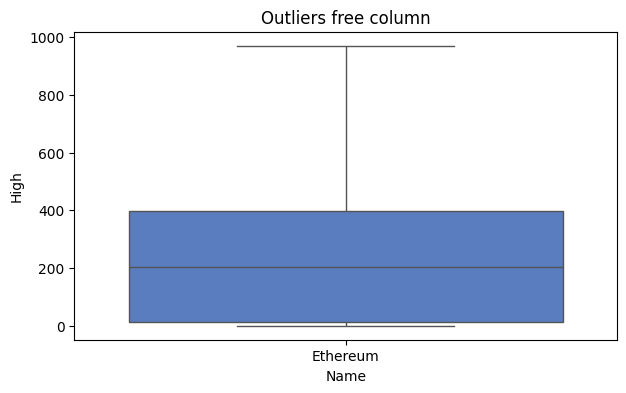

In [24]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Name', y='High', data=df)
plt.title('Outliers free column')
plt.show()

Column Skewness: 1.161157517188705


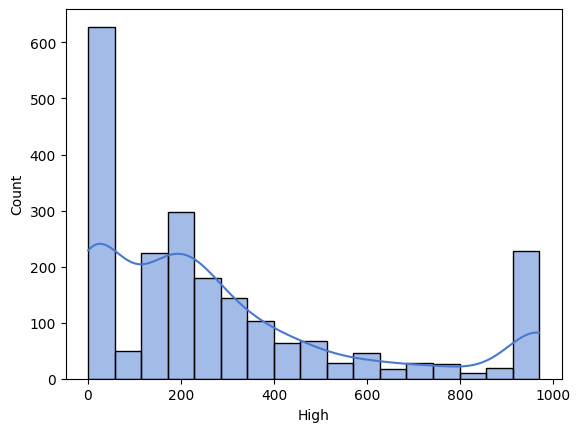

In [25]:
print(f"Column Skewness: {df['High'].skew()}")
sns.histplot(df['High'],kde=True)
plt.show()

In [26]:
df['High'] = np.sqrt(df['High'])

Column Skewness: 0.26376956949501323


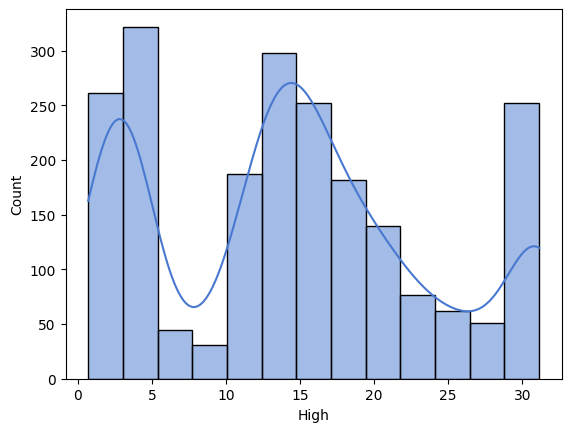

In [27]:
print(f"Column Skewness: {df['High'].skew()}")
sns.histplot(df['High'],kde=True)
plt.show()

In [28]:
df['High'].sample(10)

,High
1055,21.062241
566,3.637623
247,2.991093
259,2.924539
1325,11.734366
95,0.972254
702,15.590734
641,9.635710
718,14.517817
1627,13.034957


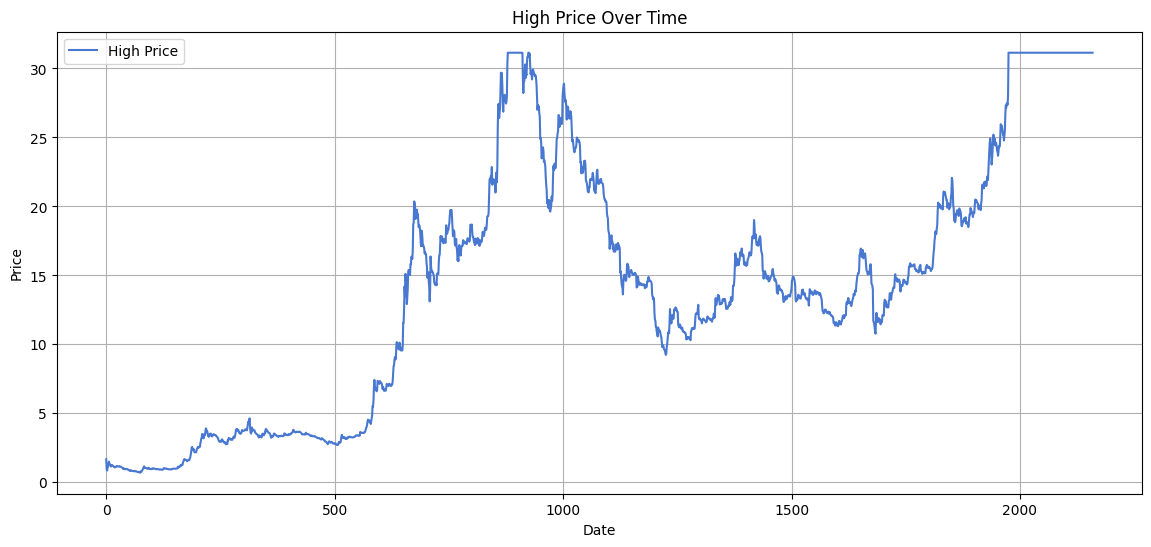

In [29]:
plt.figure(figsize=(14,6))
plt.plot(df['High'], label='High Price')
plt.title('High Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# **3.3 Low Column**

In [30]:
df['Low'].head(10)

,Low
0,0.714725
1,0.629191
2,0.636546
3,0.663235
4,0.883608
5,1.171990
6,1.754750
7,1.570980
8,1.089810
9,1.185340


In [31]:
df['Low'].isnull().sum()

np.int64(0)

In [32]:
df['Low'].value_counts()

,count
Low,
11.776800,2
263.068267,1
227.269217,1
210.391273,1
197.377895,1
...,...
196.149002,1
193.410995,1
204.688004,1


In [33]:
df['Low'].describe()

,Low
count,2160.000000
mean,365.592589
std,566.611523
min,0.420897
25%,13.190950
50%,193.302715
75%,375.146804
max,3785.848603


In [34]:
df['Low'].unique()

array([7.14725018e-01, 6.29190981e-01, 6.36546016e-01, ...,
       2.19083770e+03, 2.16304139e+03, 2.19791939e+03])

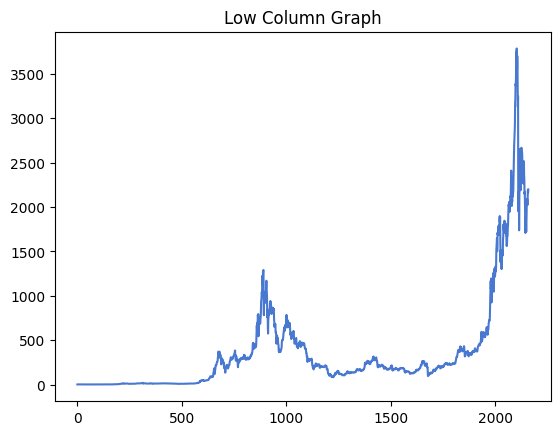

In [35]:
plt.title('Low Column Graph')
plt.plot(df['Low'])
plt.show()

Column Skewness: 2.931692699792399


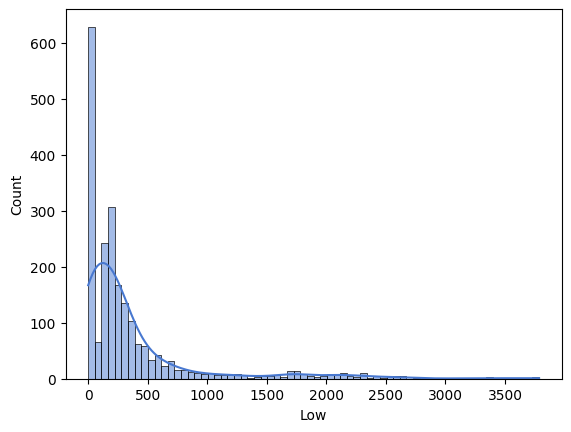

In [36]:
print(f"Column Skewness: {df['Low'].skew()}")
sns.histplot(df['Low'],kde=True)
plt.show()

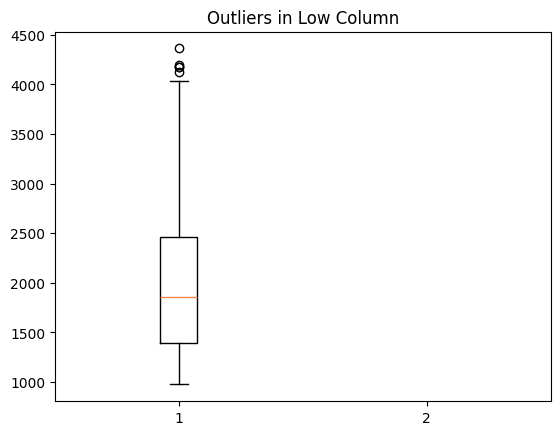

In [37]:
Q3 = df['Low'].quantile(0.75)
Q1 = df['Low'].quantile(0.25)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers['Low'] = df['Low'][(df['Low'] > upper_bound) | (df['Low'] < lower_bound)]

plt.title('Outliers in Low Column')
plt.boxplot(outliers)
plt.show()

In [38]:
# Removing outliers using Capping

df['Low'] = np.where(
    df['Low'] > upper_bound,
    upper_bound,
    np.where(
        df['Low'] < lower_bound,
        lower_bound,
        df['Low']
    )
)

Low column skewness: 1.1747290922007587


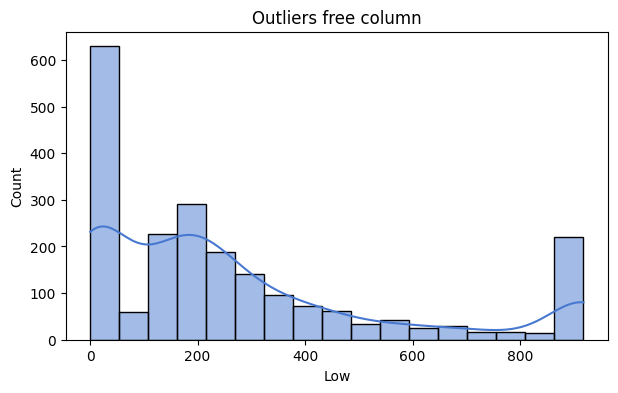

In [39]:
plt.figure(figsize=(7,4))
print(f"Low column skewness: {df['Low'].skew()}")
sns.histplot(df['Low'],kde=True)
plt.title('Outliers free column')
plt.show()

In [40]:
df['Low'] = np.sqrt(df['Low'])

Low column skewness: 0.2633303068429273


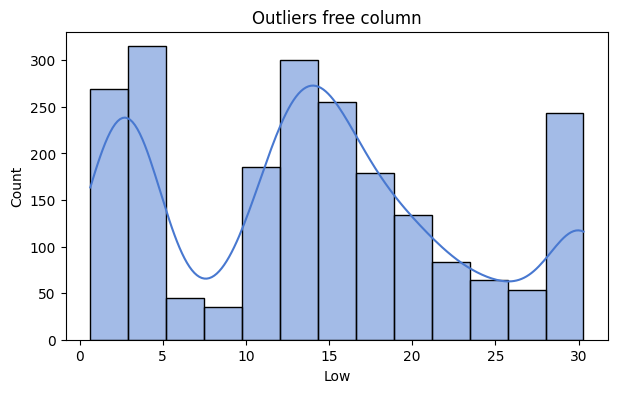

In [41]:
plt.figure(figsize=(7,4))
print(f"Low column skewness: {df['Low'].skew()}")
sns.histplot(df['Low'],kde=True)
plt.title('Outliers free column')
plt.show()

## **3.4 Close Column**

In [42]:
df['Close']

,Close
0,0.753325
1,0.701897
2,0.708448
3,1.067860
4,1.217440
...,...
2155,2150.040364
2156,2226.114282
2157,2321.724112
2158,2198.582464


In [43]:
df['Close'].describe()

,Close
count,2160.000000
mean,383.910691
std,601.078766
min,0.434829
25%,13.819200
50%,198.643691
75%,386.435272
max,4168.701049


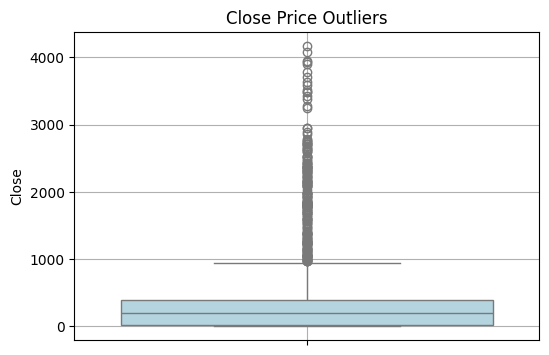

In [44]:
# Boxplot to detect outliers in price
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Close'], color='lightblue')
plt.title('Close Price Outliers')
plt.grid(True)
plt.show()

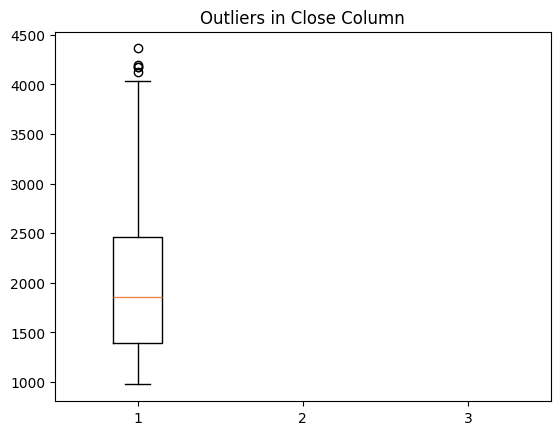

In [45]:
Q3 = df['Close'].quantile(0.75)
Q1 = df['Close'].quantile(0.25)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers['Close'] = df['Close'][(df['Close'] > upper_bound) | (df['Close'] < lower_bound)]

plt.title('Outliers in Close Column')
plt.boxplot(outliers)
plt.show()

# Removing outliers using Capping

df['Close'] = np.where(
    df['Close'] > upper_bound,
    upper_bound,
    np.where(
        df['Close'] < lower_bound,
        lower_bound,
        df['Close']
    )
)

Low column skewness: 1.1658646850350587


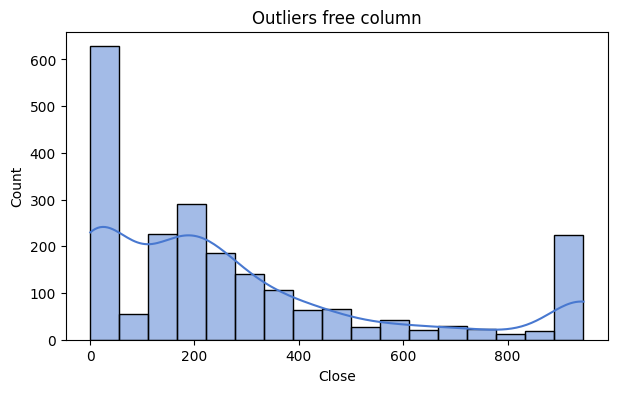

In [46]:
plt.figure(figsize=(7,4))
print(f"Low column skewness: {df['Close'].skew()}")
sns.histplot(df['Close'],kde=True)
plt.title('Outliers free column')
plt.show()

In [47]:
df['Close'] = np.sqrt(df['Close'])

Low column skewness: 0.26410250080153885


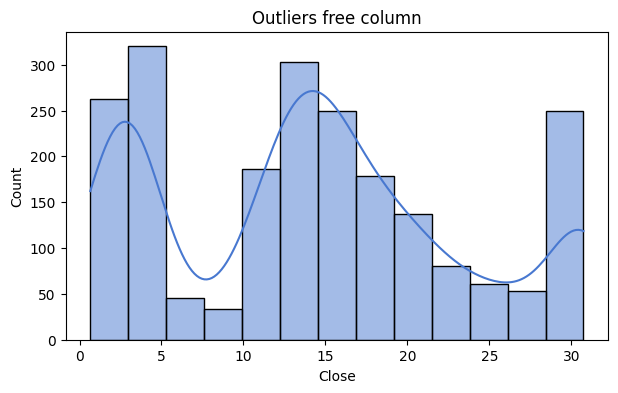

In [48]:
plt.figure(figsize=(7,4))
print(f"Low column skewness: {df['Close'].skew()}")
sns.histplot(df['Close'],kde=True)
plt.title('Outliers free column')
plt.show()

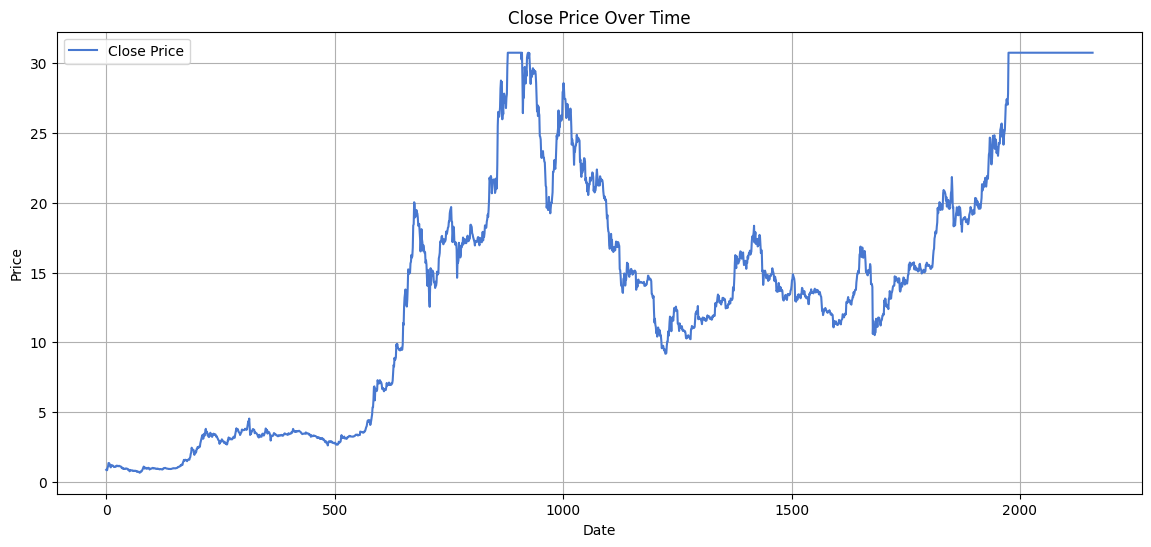

In [49]:
# (Trend & Seasonality)
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

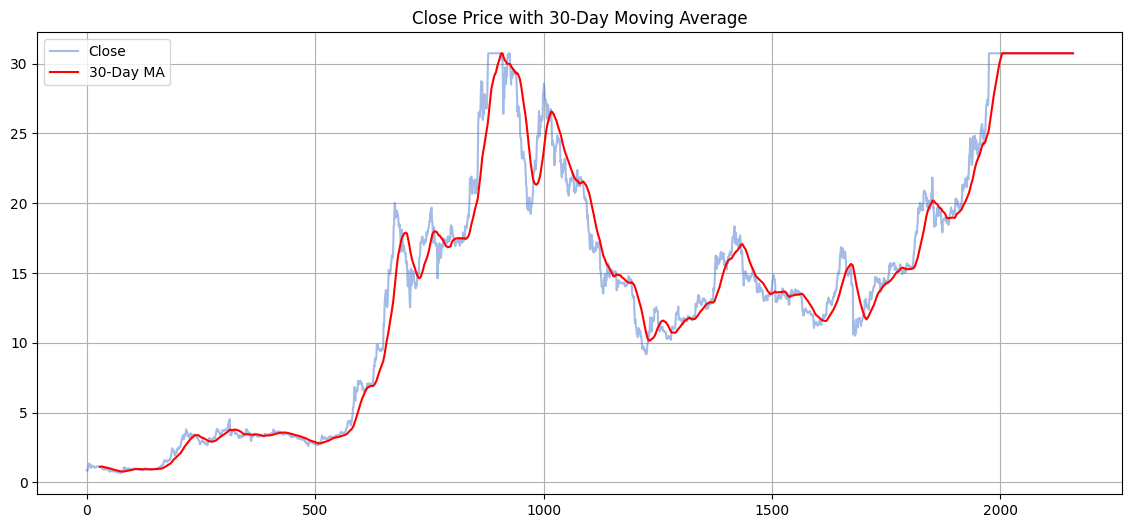

In [50]:
# Rolling Average (30-day)

df['Close_MA30'] = df['Close'].rolling(30).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.plot(df['Close_MA30'], label='30-Day MA', color='red')
plt.title('Close Price with 30-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

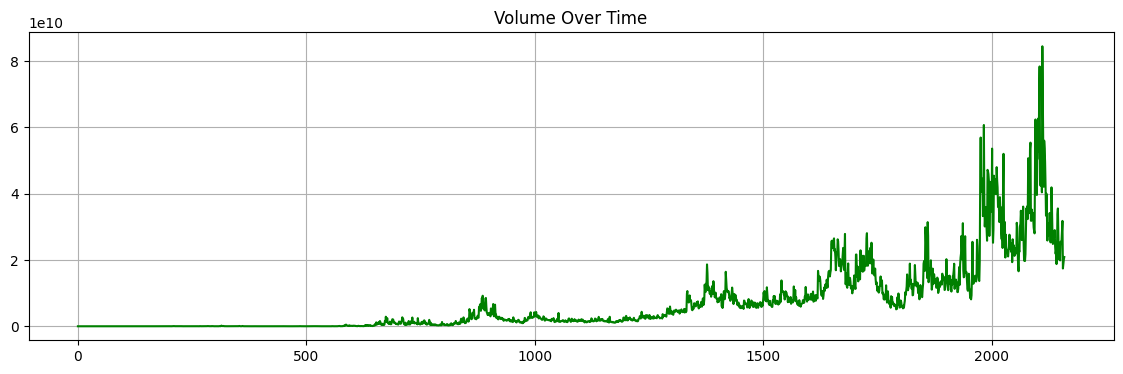

In [51]:
# Volume Trend
plt.figure(figsize=(14,4))
plt.plot(df['Volume'], color='green')
plt.title('Volume Over Time')
plt.grid(True)
plt.show()

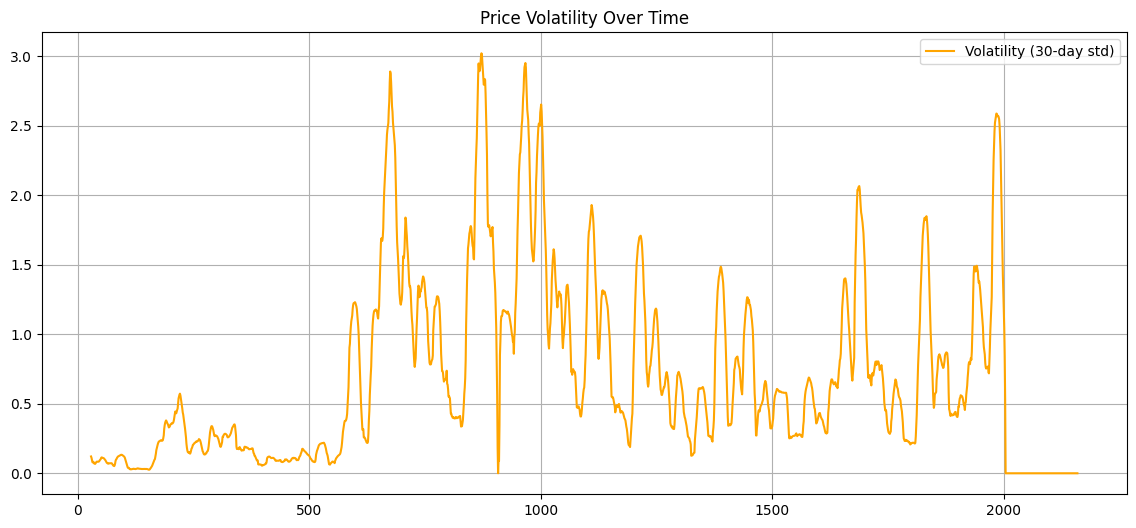

In [52]:
# Rolling Volatility (std dev)

df['Volatility'] = df['Close'].rolling(30).std()

plt.figure(figsize=(14,6))
plt.plot(df['Volatility'], color='orange', label='Volatility (30-day std)')
plt.title('Price Volatility Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
msk = (df.index< len(df)-30)
df_train = df['Close'][msk].copy()
df_test = df['Close'][~msk].copy()

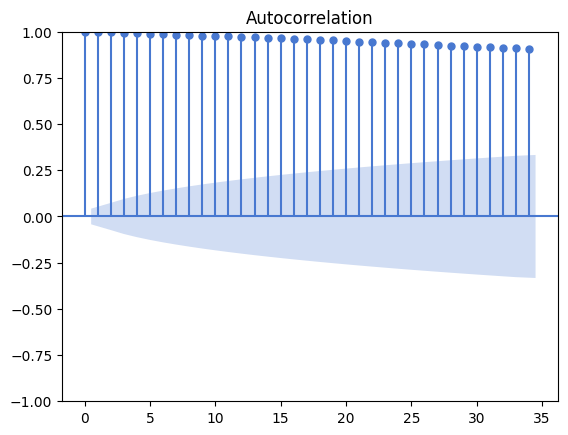

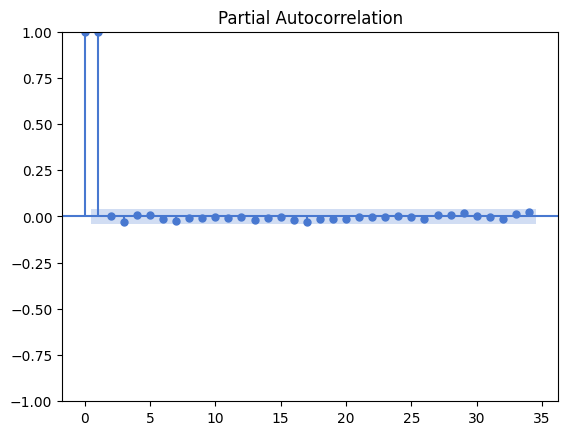

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [55]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.8306920346009325


<Axes: >

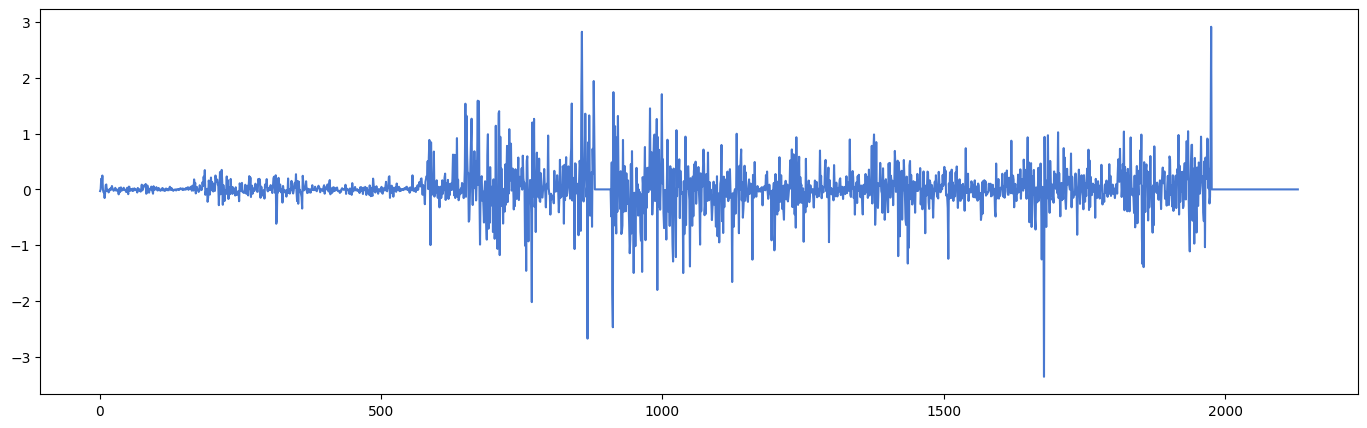

In [56]:
plt.figure(figsize=(17,5))
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

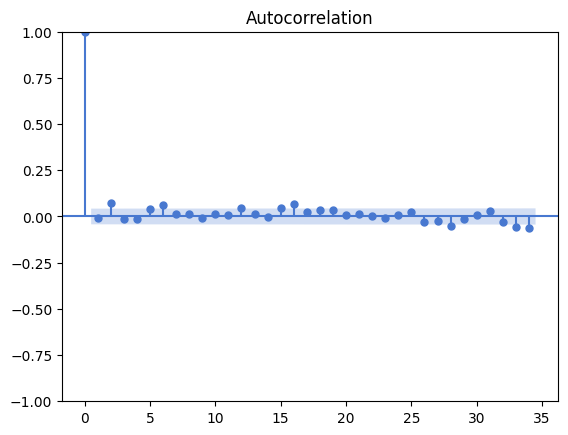

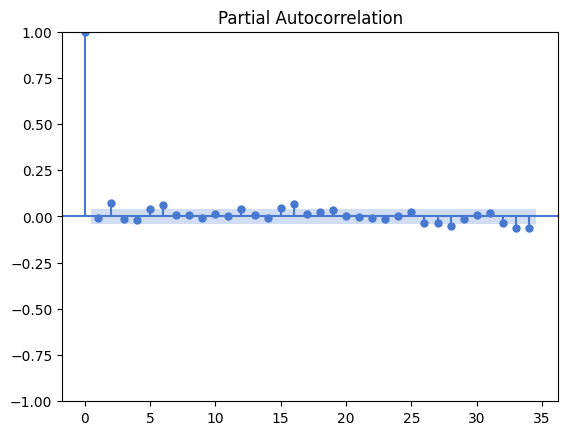

In [57]:

acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [58]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 9.135936851610852e-30


In [59]:

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2130
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -934.538
Date:                Fri, 25 Apr 2025   AIC                           1875.076
Time:                        10:43:44   BIC                           1892.066
Sample:                             0   HQIC                          1881.295
                               - 2130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0039      0.011     -0.350      0.726      -0.026       0.018
ar.L2          0.0722      0.014      5.083      0.000       0.044       0.100
sigma2         0.1409      0.002     83.307      0.0

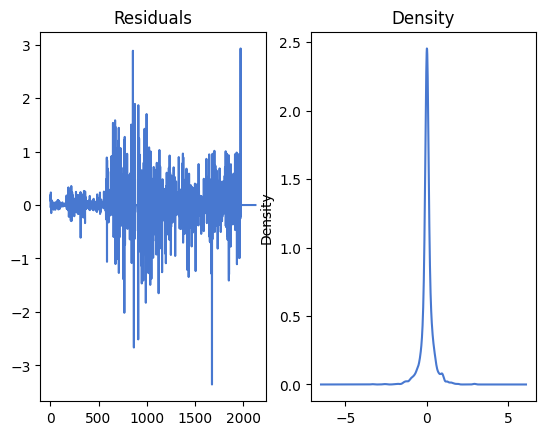

In [60]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

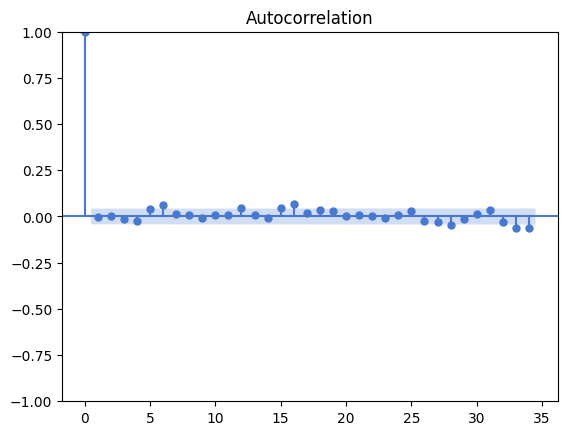

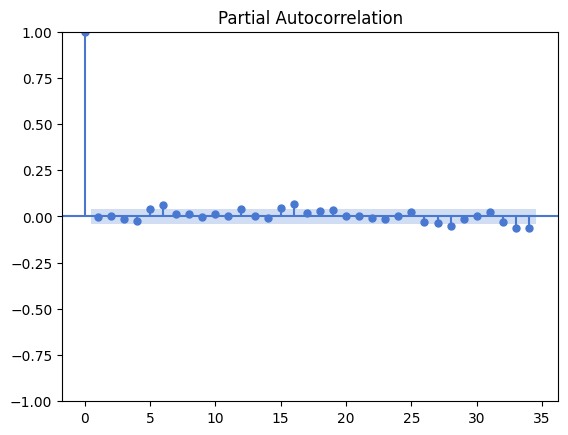

In [61]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

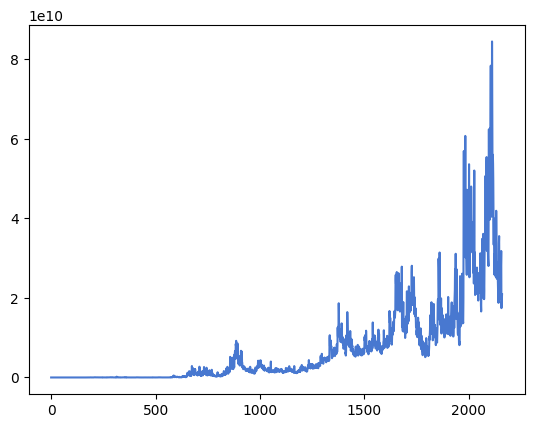

In [76]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df['Volume'].plot()

#### **I study several ML alogrithms during my course but, it was too advance to capture. Its my best from my side. I tried but my academic pressure is alot also, no having knowledge about LLM's so I dont attempt task 02. I will try but if i dont have time then this is from my side.**